In [26]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from collections import defaultdict
import numba as nb
from numba.typed import List

### Puzzle details
<img src="https://www.janestreet.com/puzzles/expelled_.jpg" width="450"    >                                                                                   


Took 0.14 seconds


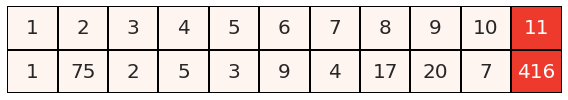

In [69]:
def next(line,row):
    before= line[:row]
    after = line[row+1:]
    next_row =[]
    while len(before) > 0:
        next_row.append(before.pop())
        next_row.append(after.pop(0))
    next_row += after
    return next_row

def main():
    number = 2000
    line = [i for i in range(1,number)]

    expelled =defaultdict(int)

    row= 0
    while len(line)>row*2:
        expelled[row+1] = line[row]
        line=next(line,row)
        row +=1
    
    inverted = {v:k for k,v in expelled.items()}

    output = np.array([[i+1, inverted[i+1]] for i in range(11)]).T

    fig,ax = plt.subplots(1,1,figsize=(8,1.5))
    m =np.zeros_like(output)
    m[:,-1] =5
    ax = sns.heatmap(m,annot=output,cbar=False,cmap="Reds",center= 4,fmt="",linewidths=1,linecolor="k",annot_kws={"size":20})
    ax.axis("off")
    plt.plot()
    plt.tight_layout()

start = time.time()
main()
print("Took {:.2f} seconds".format(time.time()-start))

In [70]:
url='https://www.janestreet.com/puzzles/solutions/may-2020-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print("Solution")
print("~~~~~~~~")
print(" ".join(x[7:12]))

Solution
~~~~~~~~
The answer to this month’s puzzle is 416. As suggested by the title, one number is expelled in each row.  The nth number in the nth row of the grid is expelled, and does not appear in any future rows. In each successive row, the numbers are re-ordered.  Starting at the expelled number in row n-1, row n is generated by writing the numbers positioned (-1,1,-2,2,-3,3,-4,4,…) away from the expelled number, as long as they exist, where negative numbers mean “to the left” and positive numbers mean “to the right.” The bottom grid displays, for each number 1 through 10, the number of the row where it is eventually expelled.  It is not until row 416 that the number 11 is finally expelled!  Most solvers wrote a quick program to compute this instead of running through it manually.   A program would have been essential if we had asked for the row where the number 48 is expelled!


### Solution
<img src="https://www.janestreet.com/puzzles/may20_solution.png" width="600">
